In [2]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 4.2 MB/s eta 0:00:01
     ----------------- ---------------------- 1.3/3.0 MB 3.7 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/3.0 MB 3.7 MB/s eta 0:00:01
     ---------------------------------- ----- 2.6/3.0 MB 3.6 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 3.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
   ------

DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [78]:
stock_data=yf.download('AAPL','2024-01-01')
stock_data.head(10)


*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.734985,187.521338,182.993517,186.237618,82488700
2024-01-03,183.351746,184.973804,182.535736,183.321893,58414500
2024-01-04,181.023163,182.197403,179.998185,181.261983,71983600
2024-01-05,180.296707,181.869006,179.291637,181.102771,62303300
2024-01-08,184.655365,184.695178,180.615161,181.202281,59144500
2024-01-09,184.237411,184.247357,181.839157,183.023358,42841800
2024-01-10,185.282303,185.491271,183.023365,183.451277,46792900
2024-01-11,184.685211,186.138100,182.724814,185.630577,49128400


In [79]:
stock_data.items()

<generator object DataFrame.items at 0x000001826EEED5D0>

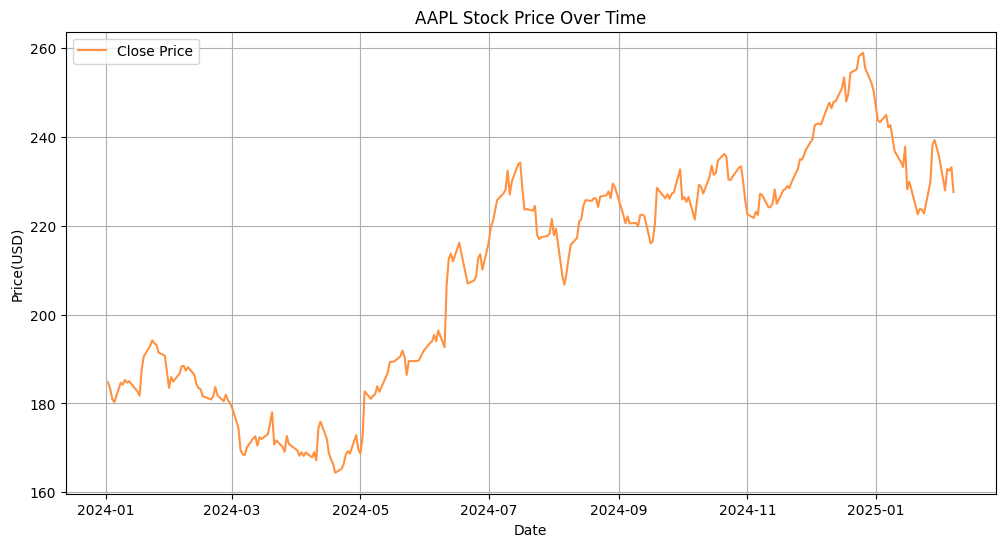

In [80]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index,stock_data.Close,label='Close Price',color='#FF9140')
plt.title("AAPL Stock Price Over Time")
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.grid(True)
plt.show()
          
    

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_additive = seasonal_decompose(stock_data["Close"],model='additive',period=30)

In [82]:
trend_additive=decomposition_additive.trend
seasonal_additive=decomposition_additive.seasonal
residual_additive=decomposition_additive.resid

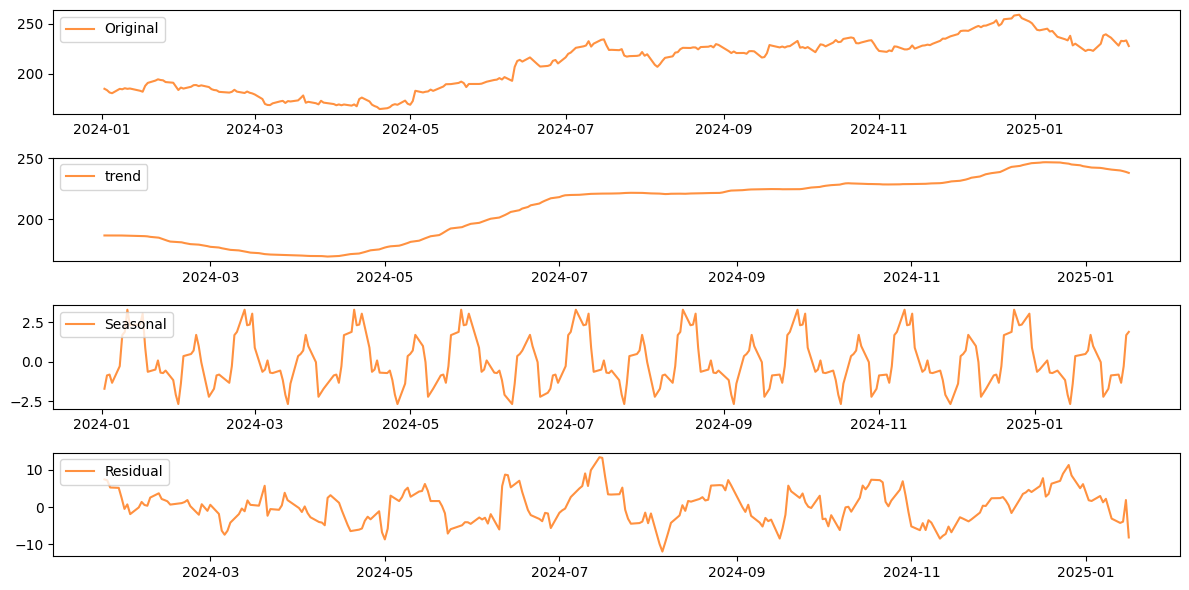

In [83]:
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(stock_data.Close,label="Original",color="#FF9140")
plt.legend(loc="upper left")

plt.subplot(412)
plt.plot(trend_additive,label="trend",color="#FF9140")
plt.legend(loc="upper left")

plt.subplot(413)
plt.plot(seasonal_additive,label="Seasonal",color="#FF9140")
plt.legend(loc="upper left")

plt.subplot(414)
plt.plot(residual_additive,label="Residual",color="#FF9140")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()


# STL Decomposition using LOESS

In [84]:
from statsmodels.tsa.seasonal import STL

In [85]:
stl_decomposition=STL(stock_data["Close"],period=30)
result=stl_decomposition.fit()

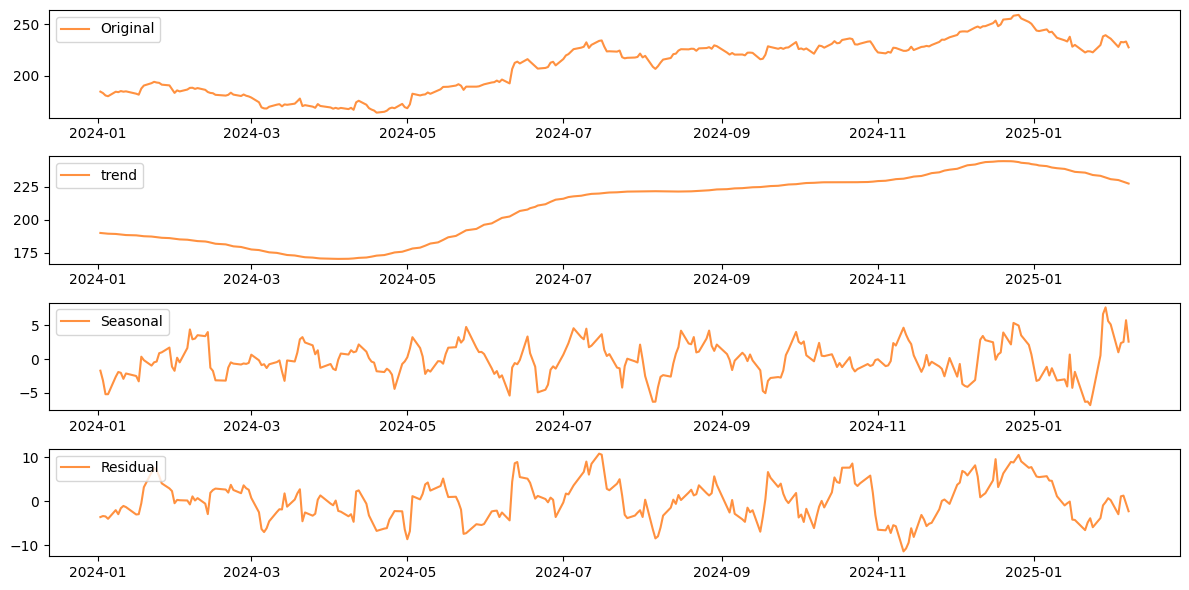

In [86]:
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(result.observed,label="Original",color="#FF9140")
plt.legend(loc="upper left")

plt.subplot(412)
plt.plot(result.trend,label="trend",color="#FF9140")
plt.legend(loc="upper left")

plt.subplot(413)
plt.plot(result.seasonal,label="Seasonal",color="#FF9140")
plt.legend(loc="upper left")

plt.subplot(414)
plt.plot(result.resid,label="Residual",color="#FF9140")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

# Tests for staionarity

In [89]:
from statsmodels.tsa.stattools import adfuller

adf_test=adfuller(stock_data.Close)

print("ADF Test Results")
print(f'ADF statistic: {round(adf_test[0],3)}')
print(f'Print p-value: {round(adf_test[1],3)}')
print("Critical Values")
for key,value in adf_test[4].items():
    print(f'Key:{key} and Value:{round(value,3)}')


ADF Test Results
ADF statistic: -1.084
Print p-value: 0.721
Critical Values
Key:1% and Value:-3.454
Key:5% and Value:-2.872
Key:10% and Value:-2.572


In [90]:
from statsmodels.tsa.stattools import kpss

kpss_test=kpss(stock_data.Close,regression='ct') # In regression we have 'c' for constant(Level Stationary), and 'ct for  trend

print('KPSS Test Results')

print(f'ADF statistic: {round(kpss_test[0],3)}')
print(f'Print p-value: {kpss_test[1]}')
print("Critical Values")
for key,value in kpss_test[3].items():
    print(f'Key:{key} and Value:{value}')


KPSS Test Results
ADF statistic: 0.191
Print p-value: 0.019467803200042405
Critical Values
Key:10% and Value:0.119
Key:5% and Value:0.146
Key:2.5% and Value:0.176
Key:1% and Value:0.216


# Strict Staitionarity

In [91]:
import numpy as np
import scipy.stats as ks_2samp
import matplotlib.pyplot as plt

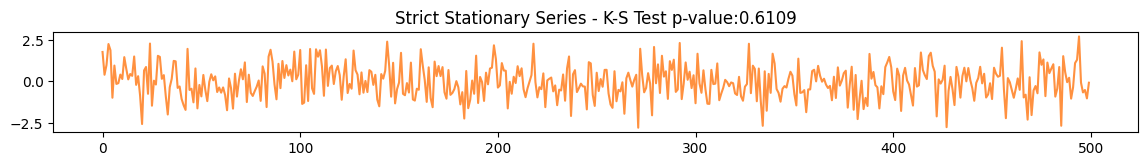

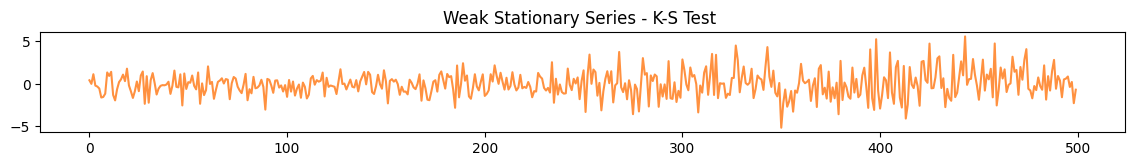

(0.068, 0.6109101078019121, 0.184, 0.00040888636357191906)

In [92]:
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

#generate synthetic data for demonstration 
np.random.seed(0)
n=500

#strict stationary series: normally distributed random noise
strict_stationary_series=np.random.normal(0,1,n)

#Non-strictly increasing stationary series
non_strict_stationary_series=np.concatenate(
   [ np.random.normal(0,1,n//2),
    np.random.normal(0,2,n//2)
   ]
)


# Function to split the  series into two halves and performs the K-S test

def ks_test_stationarity(series):
    split=len(series)//2
    series_first_half=series[:split]
    series_second_half=series[split:]
    stat,p_value=ks_2samp(series_first_half, series_second_half)
    return stat,p_value


# Perform K-S test on strict stationary Series
ks_stat_strict, ks_pvalue_strict=ks_test_stationarity(strict_stationary_series)

# Perform K-S test on non strict stationary Series
ks_stat_non_strict, ks_pvalue_non_strict=ks_test_stationarity(non_strict_stationary_series)

plt.figure(figsize=(14,6))
plt.subplot(411)
plt.title("Strict Stationary Series - K-S Test p-value:0.6109")
plt.plot(strict_stationary_series,color="#FF9140")
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(411)
plt.title("Weak Stationary Series - K-S Test ")
plt.plot(non_strict_stationary_series,color="#FF9140")
plt.show()

ks_stat_strict,ks_pvalue_strict, ks_stat_non_strict, ks_pvalue_non_strict


# Making Data Staionary

In [93]:
# Performing ADF and KPSS tests
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics:',result[0])
    print('p-value:',result[1])
    for key,value in result[4].items():
        print('Critical Value (%s): %.3f' % (key,value))

def kpss_test(series):
    result=kpss(series,regression='c')
    print('KPSS Staistics:', result[0])
    print('p-value:',result[1])
    for key,value in result[3].items():
        print('Critical Value (%s): %.3f' % (key,value))

In [94]:
prices=stock_data['Close']

In [95]:
adf_test(prices)

ADF Statistics: -1.0844464669646723
p-value: 0.7212344525691927
Critical Value (1%): -3.454
Critical Value (5%): -2.872
Critical Value (10%): -2.572


In [96]:
kpss_test(prices)

KPSS Staistics: 2.2297866283993217
p-value: 0.01
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


In [106]:
prices.columns
#prices
prices1=prices['AAPL']

In [120]:
# 1st order differencing
prices_diff=prices1.diff()

In [110]:
#second order differencing
prices1.diff().diff()

Date
2024-01-02          NaN
2024-01-03          NaN
2024-01-04    -0.945343
2024-01-05     1.602127
2024-01-08     5.085114
                ...    
2025-02-03    -6.400009
2025-02-04    12.780014
2025-02-05    -5.120010
2025-02-06     1.080002
2025-02-07    -6.339996
Name: AAPL, Length: 277, dtype: float64

# Transformation

In [111]:
import numpy as np
from scipy import stats

#Log transformation
prices_log=np.log(prices1)

#Power transformation(Square root transoformation)
prices_square_root=np.sqrt(prices1)

#Box-Cox  transformation
#Note: Box-Cox requires all positive values
prices_boxcox, lam=stats.boxcox(prices1[prices1>0])

In [116]:
prices_log
adf_test(prices_log)

ADF Statistics: -1.0464818776199278
p-value: 0.7359360524979944
Critical Value (1%): -3.454
Critical Value (5%): -2.872
Critical Value (10%): -2.572


In [117]:
prices_square_root
adf_test(prices_square_root)

ADF Statistics: -1.0638445253457698
p-value: 0.7292729060243686
Critical Value (1%): -3.454
Critical Value (5%): -2.872
Critical Value (10%): -2.572


In [119]:
prices_boxcox
adf_test(prices_boxcox)

ADF Statistics: -1.122516818288835
p-value: 0.7060094455660088
Critical Value (1%): -3.454
Critical Value (5%): -2.872
Critical Value (10%): -2.572


In [122]:
adf_test(prices_diff.dropna())

ADF Statistics: -15.781291168617797
p-value: 1.1303555402505282e-28
Critical Value (1%): -3.454
Critical Value (5%): -2.872
Critical Value (10%): -2.572


# Making data staionary by detrending

In [135]:
from scipy import signal


#using a linear trend

trend = np.polyfit(np.arange(len(prices1)),prices1,1)
trendline=np.polyval(trend,np.arange(len(prices1)))
prices_detrended=prices1=trendline


In [136]:
adf_test(prices_detrended)

ADF Statistics: -0.23197892303591283
p-value: 0.9346009098171929
Critical Value (1%): -3.454
Critical Value (5%): -2.872
Critical Value (10%): -2.572


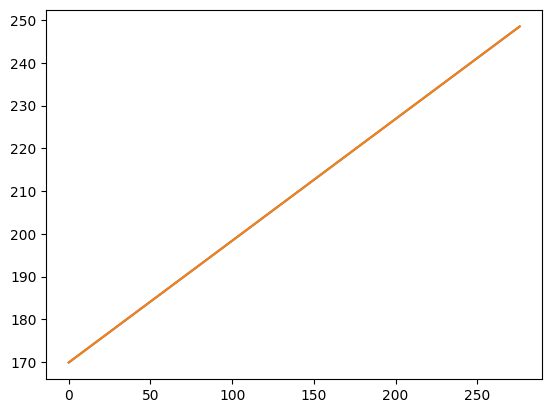

In [142]:
plt.plot(np.arange(len(prices1)),trendline)
plt.plot(np.arange(len(prices1)),prices1)
plt.show()

In [132]:
type(prices1)

pandas.core.series.Series

In [128]:
#Using a moving average to remove trend(window)
window=12 #window size
prices_ma=prices1.rolling(window=window).mean()
prices_detrended=prices1-prices_ma
prices_detrended.dropna()



Date
2024-01-18    3.917479
2024-01-19    6.342262
2024-01-22    7.861479
2024-01-23    8.044759
2024-01-24    6.263474
                ...   
2025-02-03   -2.009171
2025-02-04    2.402504
2025-02-05    1.865002
2025-02-06    1.733335
2025-02-07   -4.173328
Name: AAPL, Length: 266, dtype: float64

In [145]:
adf_test(prices_detrended)

ADF Statistics: -0.23197892303591283
p-value: 0.9346009098171929
Critical Value (1%): -3.454
Critical Value (5%): -2.872
Critical Value (10%): -2.572


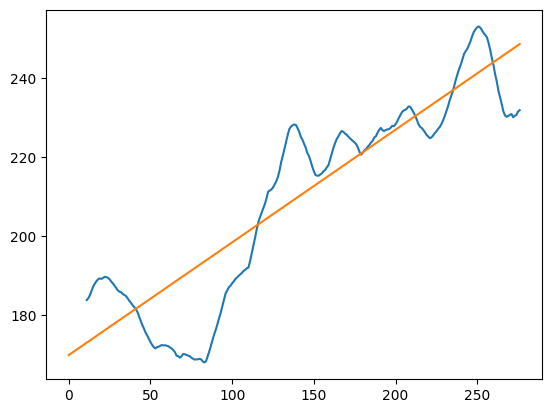

In [143]:
plt.plot(np.arange(len(prices1)),prices_ma)
plt.plot(np.arange(len(prices1)),prices1)
plt.show()

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose
#seasonal decomposition using moving averages
decomposition=seasonal_decompose(prices1,model='additive',period=30)
prices_adjusted=prices1/decomposition.seasonal
prices_adjusted = prices_adjusted.dropna()
prices_adjusted



Date
2024-01-02   -107.748803
2024-01-03   -210.571870
2024-01-04   -221.268434
2024-01-05   -134.680277
2024-01-08   -644.619508
                 ...    
2025-02-03   -278.701430
2025-02-04   -173.899842
2025-02-05   -811.537199
2025-02-06    138.947529
2025-02-07    120.853966
Length: 277, dtype: float64

In [144]:
adf_test(prices_adjusted)

ADF Statistics: -8.57448122688119
p-value: 8.031876436397547e-14
Critical Value (1%): -3.456
Critical Value (5%): -2.873
Critical Value (10%): -2.573


In [148]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

np.random.seed(0)
n=1000

#White Noise
white_noise=np.random.normal(0,1,n)

#Random Walk
random_shocks=np.random.normal(0,1,n)
random_walk=np.cumsum(random_shocks)

